<a href="https://colab.research.google.com/github/sijangel/Netflix/blob/main/Netflix_movieSlf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('/content/drive/MyDrive/Jobaaj_Projects/Python /Python_Netflix/mymoviedb.csv')

In [49]:
df.columns

Index(['Release_Date', 'Year', 'Month', 'M_name', 'Title', 'Popularity',
       'Vote_Count', 'Vote_Average', 'Original_Language', 'Genre'],
      dtype='object')

In [4]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,12/15/2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,3/1/2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2/25/2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,11/24/2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,12/22/2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [5]:
#checking the number of rows and columns
df.shape

(9837, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


Total rows= 9837
Total column= 9 columns.

Using df.info() we found out that there are missing values in the dataframe which we need to clean.




**To-Do list for Data Cleaning and Visualization**:
*  We have 9837 rows and 9 columns where we need to do data cleaning.
*  Two Columns Overview and Poster_Url needs to be dropped(deleted).
*  We need to check if there is any null/NA values and if there is we need to remove them.
*  We need to change the data type of Release_Date, Vote_Count and Vote_Average
*  Extract year and month from Release_Date and reorder them.
*  On Vote_Average we need to categorize the values in labels.
*  Data Visualization using Seaborn and matplotlib.

In [7]:
# dropping columns
df.drop(columns= ['Overview', 'Poster_Url'], axis=1, inplace= True)

In [8]:
# From here we check if there is any null/NAN values.
# As we can see the total rows is 9837 however, on the columns ( Title, Popularity, Vote_Count, Vote_Average, Original_Language)
# We can see the difference hence an inspection is required.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Popularity         9827 non-null   float64
 3   Vote_Count         9827 non-null   object 
 4   Vote_Average       9827 non-null   object 
 5   Original_Language  9827 non-null   object 
 6   Genre              9826 non-null   object 
dtypes: float64(1), object(6)
memory usage: 538.1+ KB


In [9]:
#Now checking the null/NA values
df.isnull().sum()
df.isna().sum()

,0
Release_Date,0
Title,9
Popularity,10
Vote_Count,10
Vote_Average,10
Original_Language,10
Genre,11


In [10]:
# Dropping null/NA rows
df.dropna(axis=0, inplace= True)

In [11]:
#Verifying if the null/NA values are removed
df.isnull().sum()
df.isna().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Original_Language,0
Genre,0


In [12]:
# Checking Object type and ensuring the total rows of columns match with the total rows of Index.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9826 entries, 0 to 9836
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9826 non-null   object 
 1   Title              9826 non-null   object 
 2   Popularity         9826 non-null   float64
 3   Vote_Count         9826 non-null   object 
 4   Vote_Average       9826 non-null   object 
 5   Original_Language  9826 non-null   object 
 6   Genre              9826 non-null   object 
dtypes: float64(1), object(6)
memory usage: 614.1+ KB


In [13]:
# The datatype for Release_date, Vote_Count and Vote_Average is not correct so
# assigning the correct datatype using def function.
def Change_obj_type(df,cols, dtypes):
  for col, dtype in zip(cols, dtypes):
    if dtype== 'int':
      df[col]= pd.to_numeric(df[col].astype(str).str.replace(',','').str.strip(), errors= 'coerce').fillna(0).astype(dtype)
    elif dtype== 'datetime':
      df[col]= pd.to_datetime(df[col], errors= 'coerce')
    else:
      df[col]= pd.to_numeric(df[col].astype(str).str.replace(',','').str.strip(), errors= 'coerce').fillna(0).astype(dtype)
  return df

cols= ['Release_Date','Vote_Count', 'Vote_Average']
dtypes= ['datetime', 'int', 'float']

df= Change_obj_type(df,cols, dtypes)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9826 entries, 0 to 9836
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9826 non-null   datetime64[ns]
 1   Title              9826 non-null   object        
 2   Popularity         9826 non-null   float64       
 3   Vote_Count         9826 non-null   int64         
 4   Vote_Average       9826 non-null   float64       
 5   Original_Language  9826 non-null   object        
 6   Genre              9826 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 614.1+ KB
None


In [14]:
# Extracting Year from Release_Date column and checking their datatype
df['Year']= df['Release_Date'].dt.year
print(df['Year'])
print(df['Year'].dtype)

0       2021
1       2022
2       2022
3       2021
4       2021
        ... 
9832    1973
9833    2020
9834    2016
9835    2021
9836    1984
Name: Year, Length: 9826, dtype: int32
int32


In [15]:
# Extracting Year from Release_Date column and checking their datatype
df['Month']= df['Release_Date'].dt.month
print(df['Month'])
print(df['Month'].dtype)

0       12
1        3
2        2
3       11
4       12
        ..
9832    10
9833    10
9834     5
9835     3
9836     9
Name: Month, Length: 9826, dtype: int32
int32


In [16]:
# Extracting Month from Release_Date column and checking their datatype
df['M_name']= df['Release_Date'].dt.strftime('%b')
print(df['M_name'])
print(df['M_name'].dtype)

0       Dec
1       Mar
2       Feb
3       Nov
4       Dec
       ... 
9832    Oct
9833    Oct
9834    May
9835    Mar
9836    Sep
Name: M_name, Length: 9826, dtype: object
object


In [17]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Year,Month,M_name
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",2021,12,Dec
1,2022-03-01,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller",2022,3,Mar


In [43]:
# Reordering the dataframe
def reorder_cols(df,front_cols, back_cols):
  front_cols=[col for col in front_cols if col in df.columns]
  back_cols= [col for col in back_cols if col in df.columns and col not in front_cols]
  new_col= front_cols+ back_cols
  return df[new_col]

front_cols= ['Release_Date', 'Year', 'Month', 'M_name']
back_cols= ['Title', 'Popularity', 'Vote_Count', 'Vote_Average', 'Original_Language','Genre']

df= reorder_cols(df,front_cols, back_cols)
print(df.head())

  Release_Date  Year  Month M_name                    Title  Popularity  \
0   2021-12-15  2021     12    Dec  Spider-Man: No Way Home    5083.954   
1   2021-12-15  2021     12    Dec  Spider-Man: No Way Home    5083.954   
2   2021-12-15  2021     12    Dec  Spider-Man: No Way Home    5083.954   
3   2022-03-01  2022      3    Mar               The Batman    3827.658   
4   2022-03-01  2022      3    Mar               The Batman    3827.658   

   Vote_Count   Vote_Average Original_Language            Genre  
0        8940  Super Popular                en           Action  
1        8940  Super Popular                en        Adventure  
2        8940  Super Popular                en  Science Fiction  
3        1151  Super Popular                en            Crime  
4        1151  Super Popular                en          Mystery  


In [20]:
# Splitting the Genre Column using explode function
df['Genre']= df['Genre'].astype(str).str.split(', ')
df= df.explode('Genre').reset_index(drop= True)
df.head(5)

,Release_Date,Year,Month,M_name,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021-12-15,2021,12,Dec,Spider-Man: No Way Home,5083.954,8940,8.3,en,Action
1,2021-12-15,2021,12,Dec,Spider-Man: No Way Home,5083.954,8940,8.3,en,Adventure
2,2021-12-15,2021,12,Dec,Spider-Man: No Way Home,5083.954,8940,8.3,en,Science Fiction
3,2022-03-01,2022,3,Mar,The Batman,3827.658,1151,8.1,en,Crime
4,2022-03-01,2022,3,Mar,The Batman,3827.658,1151,8.1,en,Mystery


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25792 entries, 0 to 25791
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       25792 non-null  datetime64[ns]
 1   Year               25792 non-null  int32         
 2   Month              25792 non-null  int32         
 3   M_name             25792 non-null  object        
 4   Title              25792 non-null  object        
 5   Popularity         25792 non-null  float64       
 6   Vote_Count         25792 non-null  int64         
 7   Vote_Average       25792 non-null  float64       
 8   Original_Language  25792 non-null  object        
 9   Genre              25792 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(4)
memory usage: 1.8+ MB


In [22]:
# defining Labels based on Vote_average
def assigning_label_Vote_Avg(df, col, label):
  desc = (df[col].describe())
  bins = [desc['min'],
         desc['25%'],
         desc['50%'],
         desc ['75%'],
         desc['max']
          ]
  df[col]= pd.cut(df[col],bins=bins, labels= labels, duplicates= 'drop')
  return df[col]

labels= ['Least Popular','Average', 'Popular', 'Super Popular']

df['Vote_Average']= assigning_label_Vote_Avg(df,'Vote_Average',labels)
print(df)

      Release_Date  Year  Month M_name                                 Title  \
0       2021-12-15  2021     12    Dec               Spider-Man: No Way Home   
1       2021-12-15  2021     12    Dec               Spider-Man: No Way Home   
2       2021-12-15  2021     12    Dec               Spider-Man: No Way Home   
3       2022-03-01  2022      3    Mar                            The Batman   
4       2022-03-01  2022      3    Mar                            The Batman   
...            ...   ...    ...    ...                                   ...   
25787   2021-03-31  2021      3    Mar  The United States vs. Billie Holiday   
25788   2021-03-31  2021      3    Mar  The United States vs. Billie Holiday   
25789   1984-09-23  1984      9    Sep                               Threads   
25790   1984-09-23  1984      9    Sep                               Threads   
25791   1984-09-23  1984      9    Sep                               Threads   

       Popularity  Vote_Count   Vote_Av

In [23]:
#checking the values for each label
df['Vote_Average'].value_counts()

,count
Vote_Average,
Least Popular,6999
Average,6581
Popular,6431
Super Popular,5540


In [24]:
df[df['Vote_Average']=='Super Popular']

,Release_Date,Year,Month,M_name,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021-12-15,2021,12,Dec,Spider-Man: No Way Home,5083.954,8940,Super Popular,en,Action
1,2021-12-15,2021,12,Dec,Spider-Man: No Way Home,5083.954,8940,Super Popular,en,Adventure
2,2021-12-15,2021,12,Dec,Spider-Man: No Way Home,5083.954,8940,Super Popular,en,Science Fiction
3,2022-03-01,2022,3,Mar,The Batman,3827.658,1151,Super Popular,en,Crime
4,2022-03-01,2022,3,Mar,The Batman,3827.658,1151,Super Popular,en,Mystery
...,...,...,...,...,...,...,...,...,...,...
25780,1973-10-15,1973,10,Oct,Badlands,13.357,896,Super Popular,en,Drama
25781,1973-10-15,1973,10,Oct,Badlands,13.357,896,Super Popular,en,Crime
25789,1984-09-23,1984,9,Sep,Threads,13.354,186,Super Popular,en,War
25790,1984-09-23,1984,9,Sep,Threads,13.354,186,Super Popular,en,Drama


In [25]:
# checking if the null/NA values exist
df.isnull().sum()

,0
Release_Date,0
Year,0
Month,0
M_name,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,241
Original_Language,0
Genre,0


In [26]:
df.dropna(axis=0, inplace= True)

In [27]:
df.isna().sum()
df.isnull().sum()

,0
Release_Date,0
Year,0
Month,0
M_name,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Original_Language,0
Genre,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25551 entries, 0 to 25791
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       25551 non-null  datetime64[ns]
 1   Year               25551 non-null  int32         
 2   Month              25551 non-null  int32         
 3   M_name             25551 non-null  object        
 4   Title              25551 non-null  object        
 5   Popularity         25551 non-null  float64       
 6   Vote_Count         25551 non-null  int64         
 7   Vote_Average       25551 non-null  category      
 8   Original_Language  25551 non-null  object        
 9   Genre              25551 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(1), int32(2), int64(1), object(4)
memory usage: 1.8+ MB


# **Most Frequent Genre of movies Released in Netflix**



In [29]:
df.head(2)

,Release_Date,Year,Month,M_name,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021-12-15,2021,12,Dec,Spider-Man: No Way Home,5083.954,8940,Super Popular,en,Action
1,2021-12-15,2021,12,Dec,Spider-Man: No Way Home,5083.954,8940,Super Popular,en,Adventure


In [30]:
def Column_percentage(df, col):
  value_counts= df[col].value_counts().rename_axis(col).reset_index(name= 'Count')
  Total_value_counts = value_counts['Count'].sum()
  value_counts['Percentage']= round((value_counts['Count']/Total_value_counts)*100,1)
  value_counts= value_counts.sort_values(by= 'Percentage', ascending = False)
  return value_counts

In [31]:
df_percentage= Column_percentage(df, 'Genre')
print(df_percentage.head())

       Genre  Count  Percentage
0      Drama   3715        14.5
1     Comedy   3006        11.8
2     Action   2652        10.4
3   Thriller   2473         9.7
4  Adventure   1829         7.2


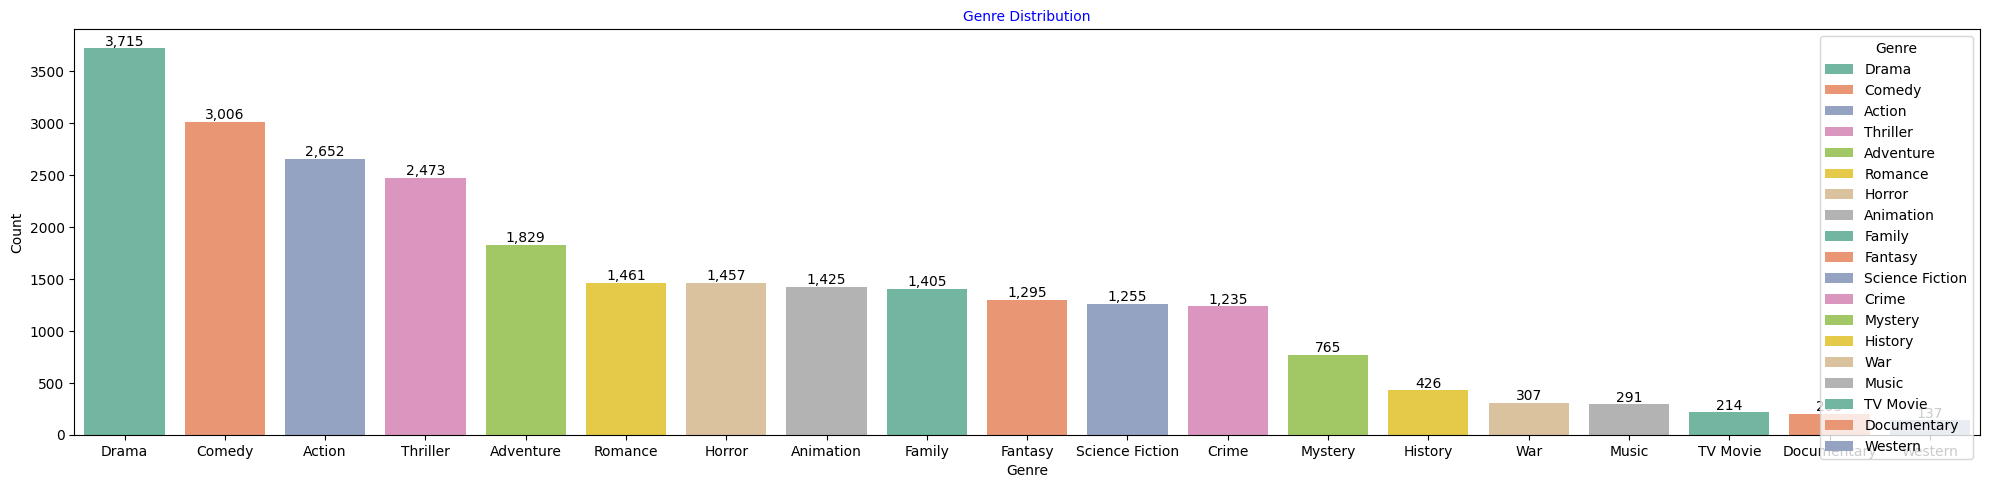

In [32]:
plt.figure(figsize= (20,5))

ax= sns.barplot(df_percentage, x= 'Genre',y= 'Count',hue= 'Genre',legend= True, palette= 'Set2', errorbar= None)

for containers in ax.containers:
  ax.bar_label(containers, fmt= '{:,.0f}', padding= 0)

plt.title('Genre Distribution', size= 10,color= 'Blue')
plt.tight_layout()
plt.show()

Drama has the highest count of 3715, followed by Comedy and Action. It accounted for 14.5% of the total count of Genre.

# **Highest Votes in Vote_Avg Columns**

In [33]:
df.head(2)

,Release_Date,Year,Month,M_name,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021-12-15,2021,12,Dec,Spider-Man: No Way Home,5083.954,8940,Super Popular,en,Action
1,2021-12-15,2021,12,Dec,Spider-Man: No Way Home,5083.954,8940,Super Popular,en,Adventure


In [34]:
Vote_Avg_count= df['Vote_Average'].value_counts().reset_index()
Vote_Avg_count['Percentage']= round(Vote_Avg_count['count']/Vote_Avg_count['count'].sum()*100,2)
print(Vote_Avg_count)

    Vote_Average  count  Percentage
0  Least Popular   6999       27.39
1        Average   6581       25.76
2        Popular   6431       25.17
3  Super Popular   5540       21.68


<Figure size 2500x1500 with 0 Axes>

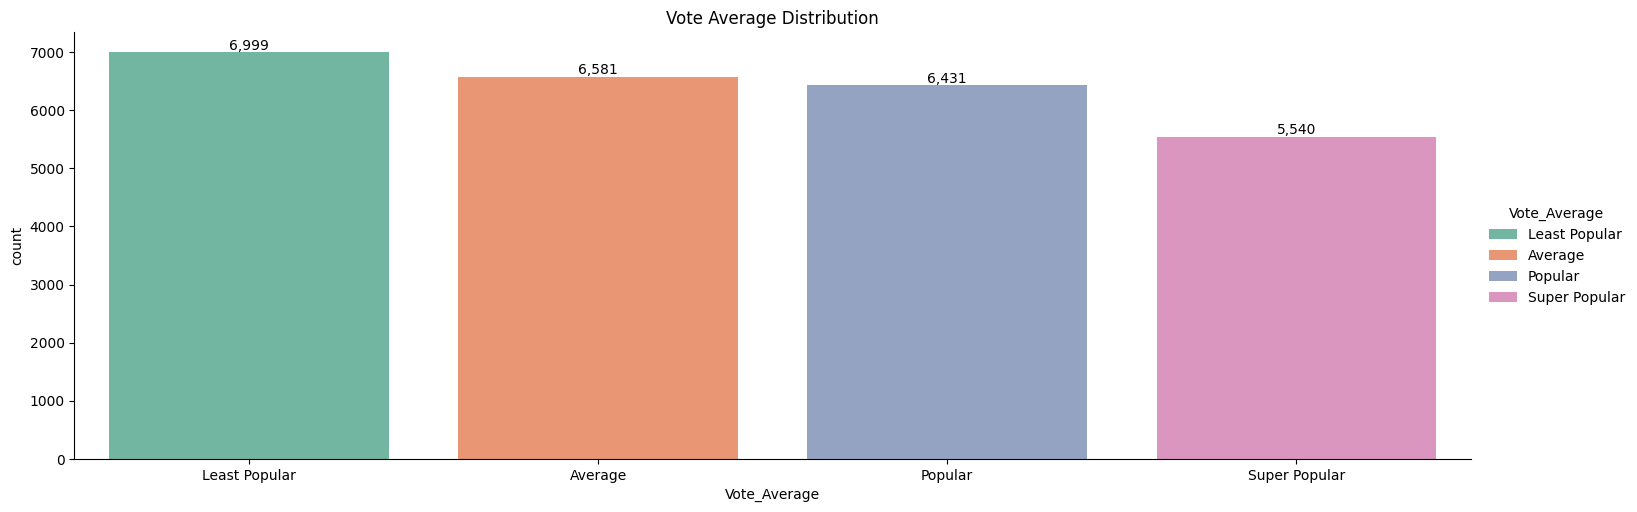

In [35]:
plt.figure(figsize= (25,15))
g= sns.catplot(Vote_Avg_count,x='Vote_Average', y= 'count',hue = 'Vote_Average',kind= 'bar', legend= True,palette= 'Set2',aspect= 3)

for ax in g.axes.flat:
  for axes in ax.containers:
    ax.bar_label(axes, fmt= '{:,.0f}')

plt.title('Vote Average Distribution')
plt.show()

The Least Popular label has received highest vote.It has recceived 27.39% votes amongst all.

# **Movie with Highest Popularity and  display it Genre as well.**



---



In [36]:
df.head(2)

,Release_Date,Year,Month,M_name,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021-12-15,2021,12,Dec,Spider-Man: No Way Home,5083.954,8940,Super Popular,en,Action
1,2021-12-15,2021,12,Dec,Spider-Man: No Way Home,5083.954,8940,Super Popular,en,Adventure


In [37]:
round(df.nlargest(5,'Popularity'),2)

,Release_Date,Year,Month,M_name,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021-12-15,2021,12,Dec,Spider-Man: No Way Home,5083.95,8940,Super Popular,en,Action
1,2021-12-15,2021,12,Dec,Spider-Man: No Way Home,5083.95,8940,Super Popular,en,Adventure
2,2021-12-15,2021,12,Dec,Spider-Man: No Way Home,5083.95,8940,Super Popular,en,Science Fiction
3,2022-03-01,2022,3,Mar,The Batman,3827.66,1151,Super Popular,en,Crime
4,2022-03-01,2022,3,Mar,The Batman,3827.66,1151,Super Popular,en,Mystery


Spider-Man: No Way Home is the movie with highest popularity of 5083.954 and the Genre is Action, Adventure and Science Fiction.




# **Movie with Lowest Popularity with its Genre**

In [38]:
df_popularity_min= df['Popularity'].min()
df_popularity_min

13.354

In [39]:
Lowest_popularity= df[df['Popularity']== df['Popularity'].min()]
Lowest_popularity

,Release_Date,Year,Month,M_name,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
25786,2021-03-31,2021,3,Mar,The United States vs. Billie Holiday,13.354,152,Popular,en,Music
25787,2021-03-31,2021,3,Mar,The United States vs. Billie Holiday,13.354,152,Popular,en,Drama
25788,2021-03-31,2021,3,Mar,The United States vs. Billie Holiday,13.354,152,Popular,en,History
25789,1984-09-23,1984,9,Sep,Threads,13.354,186,Super Popular,en,War
25790,1984-09-23,1984,9,Sep,Threads,13.354,186,Super Popular,en,Drama
25791,1984-09-23,1984,9,Sep,Threads,13.354,186,Super Popular,en,Science Fiction


In [40]:
df.nsmallest(5,'Popularity')

,Release_Date,Year,Month,M_name,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
25786,2021-03-31,2021,3,Mar,The United States vs. Billie Holiday,13.354,152,Popular,en,Music
25787,2021-03-31,2021,3,Mar,The United States vs. Billie Holiday,13.354,152,Popular,en,Drama
25788,2021-03-31,2021,3,Mar,The United States vs. Billie Holiday,13.354,152,Popular,en,History
25789,1984-09-23,1984,9,Sep,Threads,13.354,186,Super Popular,en,War
25790,1984-09-23,1984,9,Sep,Threads,13.354,186,Super Popular,en,Drama


Both the approach has confirmed that The United States vs. Billie Holiday	has received the lowest rating of 13.354 and the Genre is Music, Drama,and History.

# **Year most films were released**

In [41]:
df.head(2)

,Release_Date,Year,Month,M_name,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021-12-15,2021,12,Dec,Spider-Man: No Way Home,5083.954,8940,Super Popular,en,Action
1,2021-12-15,2021,12,Dec,Spider-Man: No Way Home,5083.954,8940,Super Popular,en,Adventure


<Axes: >

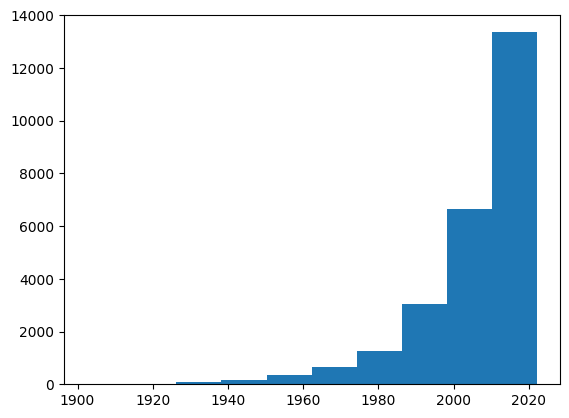

In [42]:
df['Release_Date'].hist(grid=False)

In [48]:
df['Genre'].nunique()

19

**Conclusion**


*   Year 2020 is the year where most movies were released.




**SUMMARY**
*   Most Frequent Genre of movies Released in Netflix

> Drama has the highest count of 3715, followed by Comedy and Action. It accounted for 14.5% of the total count of Genre.

*   Highest Votes in Vote_Avg Columns


> The Least Popular label has received highest vote.It has recceived 27.39% votes amongst all.


*   Movie with Highest Popularity and display it Genre as well.


> Spider-Man: No Way Home is the movie with highest popularity of 5083.954 and the Genre is Action, Adventure and Science Fiction.


*   Movie with Lowest Popularity with its Genre


> The United States vs. Billie Holiday has received the lowest rating of 13.354 and the Genre is Music, Drama,and History.


*   Year most films were released


> Year 2020 is the year where most movies were released.




